In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
%matplotlib inline

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [2]:
data = pd.read_csv('final_ip_mapped_data.csv')

In [3]:
data

,@timestamp,_id,ip_address
0,"July 8th 2019, 14:43:03.000",XswJ0msBoTGddM7vxMDB,10.1.1.285
1,"July 8th 2019, 14:43:01.000",dKQJ0msB7mP0GwVzvJjz,10.1.2.389
2,"July 8th 2019, 14:42:59.000",CcwJ0msBoTGddM7vtb8y,10.1.1.415
3,"July 8th 2019, 14:42:57.000",bKQJ0msB7mP0GwVzrZdT,10.1.1.79
4,"July 8th 2019, 14:42:55.000",L6QJ0msB7mP0GwVzpZeI,10.1.1.60
5,"July 8th 2019, 14:42:53.000",O8wJ0msBoTGddM7vnb2w,10.1.2.66
6,"July 8th 2019, 14:42:51.000",Z8wJ0msBoTGddM7vlbze,10.1.2.25
7,"July 8th 2019, 14:42:49.000",J6QJ0msB7mP0GwVzjpUY,10.1.2.247
8,"July 8th 2019, 14:42:46.000",#NAME?,10.1.1.199
9,"July 8th 2019, 14:42:46.000",#NAME?,10.1.1.387


# Feature Building

In [4]:
data['@timestamp'] = pd.to_datetime(data['@timestamp'])

In [5]:
data.sort_values(['ip_address', '@timestamp'], inplace=True)

In [6]:
data['shift_time'] = data.groupby(['ip_address'])['@timestamp'].shift(1)

In [7]:
data['time_diff'] = (data['@timestamp'] - data['shift_time']).dt.seconds//60

In [8]:
data['date'] = data['@timestamp'].dt.date

In [9]:
data['dow'] = data['@timestamp'].dt.weekday

In [10]:
data['hour'] = data['@timestamp'].dt.hour

In [11]:
data['is_weekend'] = ((data['dow']==5)|(data['dow']==6)).astype(int)

In [12]:
data['hour_bucket'] = data['hour']//4

In [13]:
data.head(10)

,@timestamp,_id,ip_address,shift_time,time_diff,date,dow,hour,is_weekend,hour_bucket
721473,2019-06-09 00:06:09,DBuOOWsB7mP0GwVzhZ9U,10.1.1.1,NaT,NaN,2019-06-09,6,0,1,0
720483,2019-06-09 01:28:39,bB7aOWsB7mP0GwVzDY5G,10.1.1.1,2019-06-09 00:06:09,82.0,2019-06-09,6,1,1,0
719233,2019-06-09 03:12:49,R0w5OmsBoTGddM7vayZT,10.1.1.1,2019-06-09 01:28:39,104.0,2019-06-09,6,3,1,0
719222,2019-06-09 03:13:45,U0w6OmsBoTGddM7vRi8R,10.1.1.1,2019-06-09 03:12:49,0.0,2019-06-09,6,3,1,0
718875,2019-06-09 03:42:39,z01UOmsBoTGddM7vuzyC,10.1.1.1,2019-06-09 03:13:45,28.0,2019-06-09,6,3,1,0
718730,2019-06-09 03:54:45,x01fOmsBoTGddM7vz6d3,10.1.1.1,2019-06-09 03:42:39,12.0,2019-06-09,6,3,1,0
718240,2019-06-09 04:35:35,nk-FOmsBoTGddM7vLRjb,10.1.1.1,2019-06-09 03:54:45,40.0,2019-06-09,6,4,1,1
717685,2019-06-09 05:21:49,N1CvOmsBoTGddM7vhbSz,10.1.1.1,2019-06-09 04:35:35,46.0,2019-06-09,6,5,1,1
717521,2019-06-09 05:35:29,tlG8OmsBoTGddM7vCDDU,10.1.1.1,2019-06-09 05:21:49,13.0,2019-06-09,6,5,1,1
717169,2019-06-09 06:04:49,uFLWOmsBoTGddM7v4zfT,10.1.1.1,2019-06-09 05:35:29,29.0,2019-06-09,6,6,1,1


# IP Profile Building

In [14]:
ip_col = 'ip_address'

## Counts

In [15]:
ip_counts = data.groupby(ip_col)['@timestamp'].count().reset_index()

In [16]:
ip_counts = ip_counts.rename(columns={'@timestamp':'total_count'})

## Daily counts average

In [17]:
daily_counts = data.groupby([ip_col, 'date'])['@timestamp'].count().reset_index()

In [18]:
daily_counts = daily_counts.rename(columns={'@timestamp':'daily_counts'})

In [19]:
daily_counts_agg = daily_counts.groupby(ip_col).daily_counts.median().reset_index()

In [20]:
daily_counts_agg.head(20)

,ip_address,daily_counts
0,10.1.1.1,40.0
1,10.1.1.100,78.0
2,10.1.1.101,40.0
3,10.1.1.106,35.5
4,10.1.1.109,42.5
5,10.1.1.110,41.0
6,10.1.1.114,37.0
7,10.1.1.118,42.0
8,10.1.1.119,42.0
9,10.1.1.12,40.0


## weekday weekend counts average

In [21]:
weekend_counts = data.groupby([ip_col, 'is_weekend'])['@timestamp'].count().reset_index()

In [22]:
weekend_counts = weekend_counts.rename(columns={'@timestamp':'weekend_counts'})

In [23]:
weekend_counts_agg = weekend_counts.pivot_table(index=ip_col, columns='is_weekend').reset_index([0])

In [24]:
weekend_counts_agg.columns = weekend_counts_agg.columns.droplevel()

In [25]:
weekend_counts_agg.columns = [ip_col, 'week_day', 'weekend']

In [26]:
weekend_counts_agg['is_weekend_ratio'] = weekend_counts_agg['week_day']/ weekend_counts_agg['weekend']

In [27]:
lean_weekend_counts_agg = weekend_counts_agg[[ip_col, 'is_weekend_ratio']]

## avg login time

In [28]:
avg_timedelta_data = data.groupby(ip_col).agg({'time_diff':['mean','max']}).reset_index()

In [29]:
avg_timedelta_data.columns = avg_timedelta_data.columns.droplevel()

In [30]:
avg_timedelta_data.columns = [ip_col, 'td_mean', 'td_max']

In [31]:
avg_timedelta_data.head(10)

,ip_address,td_mean,td_max
0,10.1.1.1,28.999308,362.0
1,10.1.1.100,14.427072,185.0
2,10.1.1.101,28.520492,211.0
3,10.1.1.106,29.771144,319.0
4,10.1.1.109,28.711934,278.0
5,10.1.1.110,28.249831,240.0
6,10.1.1.114,29.827169,300.0
7,10.1.1.118,28.976471,267.0
8,10.1.1.119,29.087561,232.0
9,10.1.1.12,30.152408,250.0


## Full Feature Set

In [32]:
merge_1 = ip_counts.merge(daily_counts_agg, on=ip_col, how='left')

In [33]:
merge_2 = merge_1.merge(lean_weekend_counts_agg, on=ip_col, how='left')

In [34]:
final_data = merge_2.merge(avg_timedelta_data, on=ip_col, how='left')

In [35]:
final_data.head(10)

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,10.1.1.1,1446,40.0,2.070064,28.999308,362.0
1,10.1.1.100,2860,78.0,2.177778,14.427072,185.0
2,10.1.1.101,1465,40.0,2.191721,28.520492,211.0
3,10.1.1.106,1408,35.5,2.229358,29.771144,319.0
4,10.1.1.109,1459,42.5,2.206593,28.711934,278.0
5,10.1.1.110,1482,41.0,2.242888,28.249831,240.0
6,10.1.1.114,1407,37.0,2.140625,29.827169,300.0
7,10.1.1.118,1446,42.0,2.308924,28.976471,267.0
8,10.1.1.119,1440,42.0,2.257919,29.087561,232.0
9,10.1.1.12,1392,40.0,2.200000,30.152408,250.0


In [36]:
ip_map = final_data[ip_col].to_dict()

In [37]:
RANDOM_STATE = 123

## KMEANS

In [167]:
final_data.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max', 'cluster', 'tsne-2d-one', 'tsne-2d-two', 'ssd',
       'anomaly_kmeans', 'anomaly_isolated', 'anomaly_svm', 'anomaly_manual'],
      dtype='object')

In [168]:
feature_cols = ['total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']

In [169]:
data_new = final_data[feature_cols]

In [170]:
min_max_scaler = preprocessing.MinMaxScaler()

In [171]:
np_scaled = min_max_scaler.fit_transform(data_new)
data_new = pd.DataFrame(np_scaled, columns=feature_cols)

/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


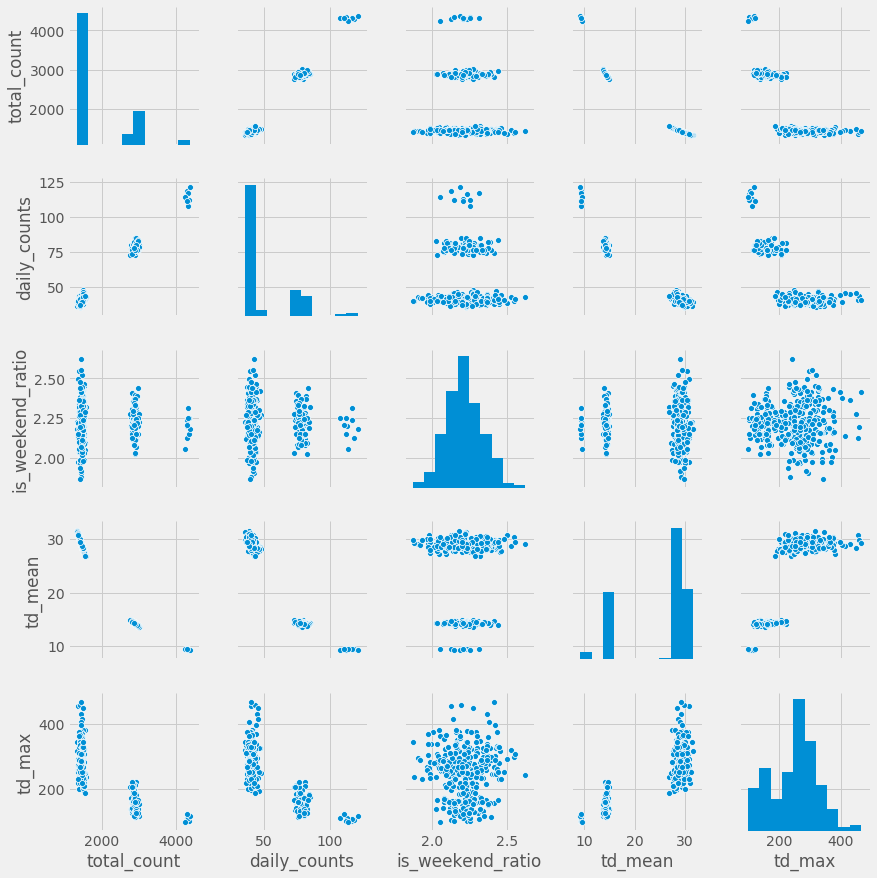

In [172]:
sns.pairplot(final_data[feature_cols])

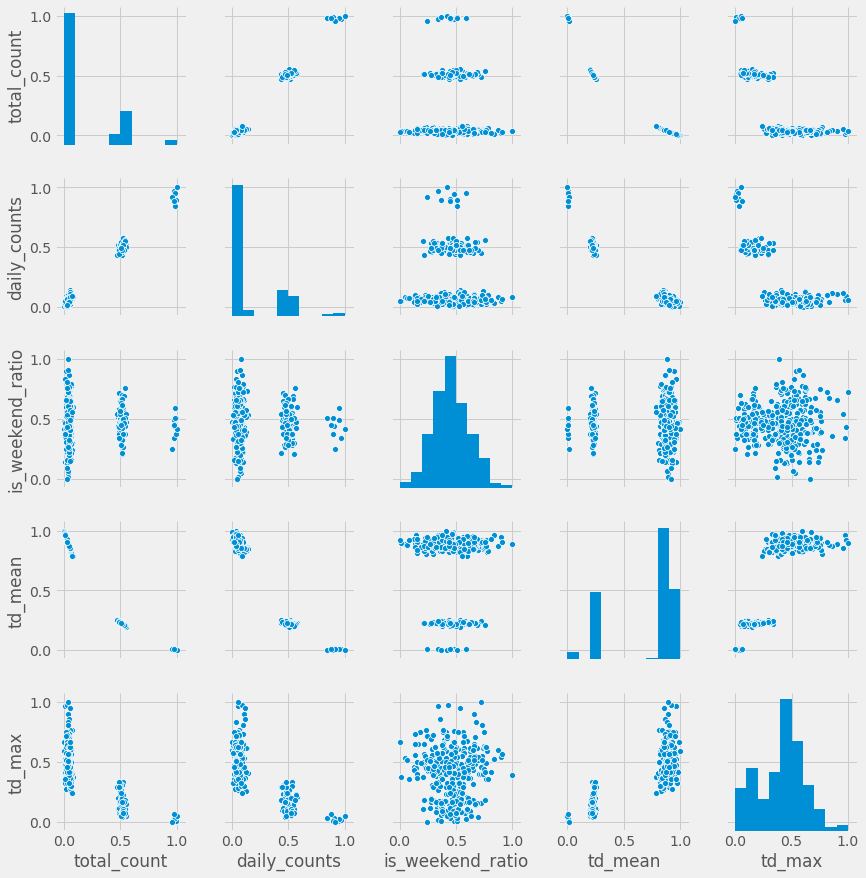

In [173]:
sns.pairplot(data_new)

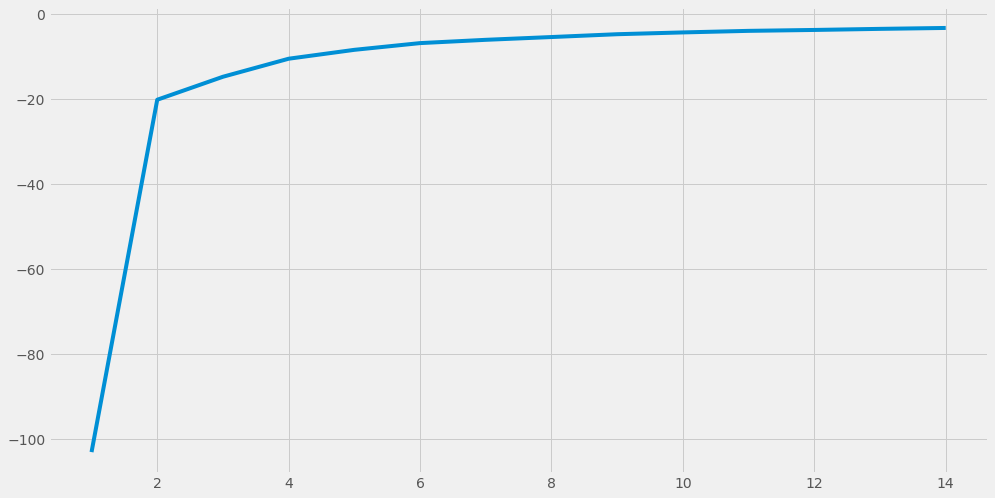

In [174]:
n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(data_new) for i in n_cluster]
scores = [kmeans[i].score(data_new) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [175]:
cluster_model = kmeans[5]

In [176]:
final_data['cluster'] = cluster_model.predict(data_new)
final_data['cluster'].value_counts()

1    103
2     94
4     73
3     60
5     46
0     10
Name: cluster, dtype: int64

In [177]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)

In [178]:
tsne_results = tsne.fit_transform(data_new)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 386 samples in 0.000s...
[t-SNE] Computed neighbors for 386 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 0.077308
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.693813
[t-SNE] KL divergence after 300 iterations: 0.342785


In [179]:
final_data['tsne-2d-one'] = tsne_results[:,0]
final_data['tsne-2d-two'] = tsne_results[:,1]

In [180]:
tsne_cluster = final_data.groupby('cluster').agg({'tsne-2d-one':'mean', 'tsne-2d-two':'mean'}).reset_index()

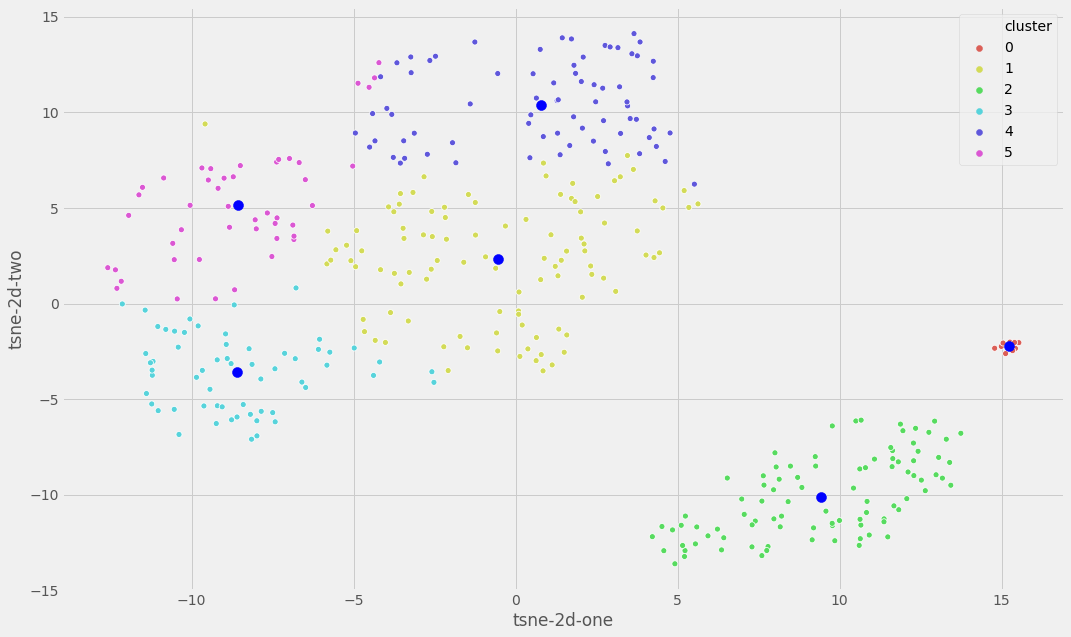

In [181]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 6),
    data=final_data,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [182]:
centers = cluster_model.cluster_centers_

In [183]:
points = np.asarray(data_new)

In [184]:
total_distance = pd.Series()

In [185]:
def get_sum_square_distance(data, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[feature_cols])
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
        for j in range(len(centers)):
            a = np.linalg.norm(points[i] - centers[j])
            distance += a**2
        total_distance.set_value(i, distance)
    
    return total_distance    

In [186]:
final_data['ssd'] = get_sum_square_distance(data_new, cluster_model)

/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


(array([ 7., 12.,  9., 33., 35., 22., 29., 29., 17., 16., 24., 10., 13.,
        20., 21., 17., 17.,  9., 11.,  8.,  4.,  3.,  3.,  2.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         2.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([ 3.36474279,  3.45164257,  3.53854235,  3.62544212,  3.7123419 ,
         3.79924167,  3.88614145,  3.97304122,  4.059941  ,  4.14684077,
         4.23374055,  4.32064032,  4.4075401 ,  4.49443987,  4.58133965,
         4.66823942,  4.7551392 ,  4.84203897,  4.92893875,  5.01583852,
         5.1027383 ,  5.18963808,  5.27653785,  5.36343763,  5.4503374 ,
         5.53723718,  5.62413695,  5.71103673,  5.7979365 ,  5.884836

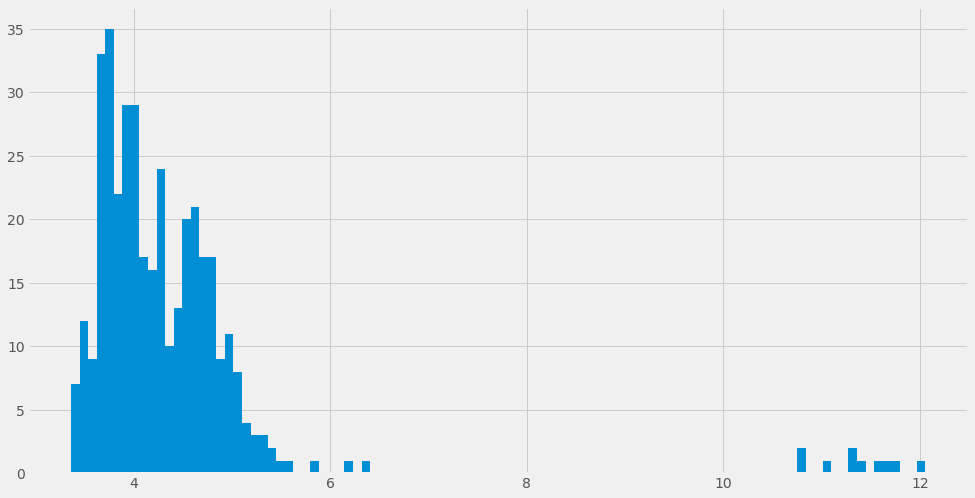

In [187]:
plt.hist(final_data['ssd'], bins=100)

In [188]:
cutoff = 6

In [189]:
final_data['anomaly_kmeans'] = (final_data['ssd'] >= cutoff).astype(int)

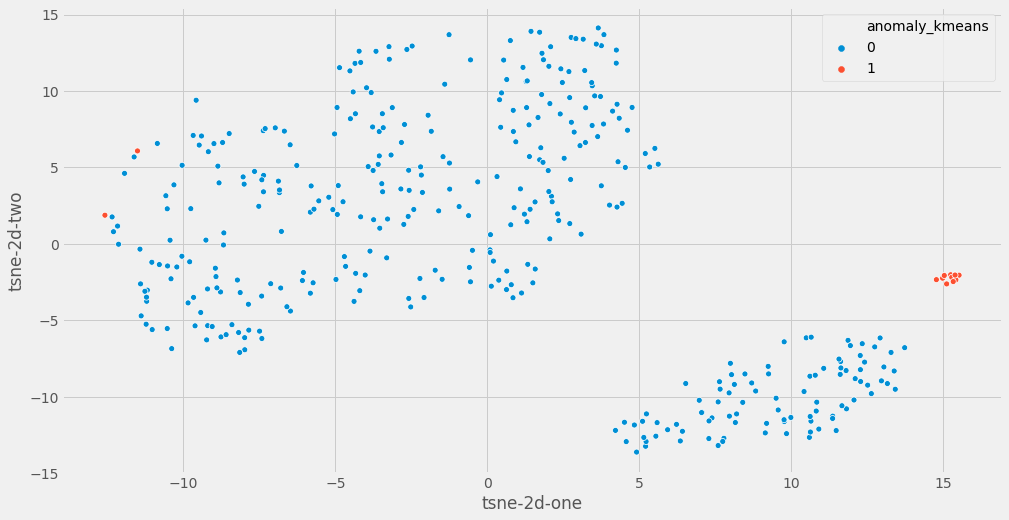

In [190]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
#     palette=sns.color_palette("hls", 10),
    data=final_data,
    legend="full",
    alpha=1
)

In [191]:
final_data.loc[final_data['anomaly_kmeans']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
42,10.1.1.199,1365,40.5,2.123570,30.801320,455.0,5,-11.512229,6.081614,6.164888,1,0,1,0
62,10.1.1.249,4301,116.5,2.236268,9.459535,101.0,0,15.251910,-2.014084,11.541074,1,1,1,1
118,10.1.1.386,4300,118.5,2.127273,9.453361,104.0,0,15.528737,-2.041709,11.779482,1,1,1,1
164,10.1.1.486,4317,117.0,2.315668,9.417285,108.0,0,14.781444,-2.334249,11.659370,1,1,1,1
177,10.1.1.63,4339,112.0,2.148766,9.368142,101.0,0,15.287605,-2.182364,11.319226,1,1,1,1
188,10.1.1.86,4293,113.0,2.203731,9.456897,110.0,0,15.423254,-2.342858,11.090154,1,1,1,1
255,10.1.2.249,4353,112.0,2.250934,9.332721,102.0,0,14.986474,-2.238024,11.318310,1,1,1,1
311,10.1.2.386,4326,108.0,2.250188,9.392370,110.0,0,15.119220,-2.613225,10.791042,1,1,1,1
331,10.1.2.432,1437,40.5,2.413302,29.176880,466.0,5,-12.583876,1.878566,6.357696,1,0,1,0
357,10.1.2.486,4251,114.0,2.056075,9.571059,99.0,0,15.041411,-2.061416,11.438757,1,1,1,1


# Isolated Forests

In [257]:
outlier_fraction = 0.028

In [258]:
final_data.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
0,10.1.1.1,1446,40.0,2.070064,28.999308,362.0,5,-4.352579,11.806170,4.570390,0,0,0,0
1,10.1.1.100,2860,78.0,2.177778,14.427072,185.0,2,9.245516,-8.002912,4.393522,0,0,0,0
2,10.1.1.101,1465,40.0,2.191721,28.520492,211.0,1,4.270270,2.411105,3.658624,0,0,0,0
3,10.1.1.106,1408,35.5,2.229358,29.771144,319.0,5,-7.361582,4.483963,4.265576,0,0,0,0
4,10.1.1.109,1459,42.5,2.206593,28.711934,278.0,1,-2.134053,3.368442,3.626661,0,0,0,0


In [259]:
final_data.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max', 'cluster', 'tsne-2d-one', 'tsne-2d-two', 'ssd',
       'anomaly_kmeans', 'anomaly_isolated', 'anomaly_svm', 'anomaly_manual'],
      dtype='object')

In [260]:
data_new.head()

,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,0.038133,0.052632,0.264803,0.884954,0.716621
1,0.502959,0.497076,0.408397,0.231366,0.234332
2,0.044379,0.052632,0.426985,0.863479,0.305177
3,0.025641,0.000000,0.477159,0.919573,0.599455
4,0.042406,0.081871,0.446812,0.872065,0.487738


In [261]:
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=RANDOM_STATE, contamination=outlier_fraction)

In [262]:
model.fit(data_new)

/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.028,
        max_features=3, max_samples='auto', n_estimators=200, n_jobs=-1,
        random_state=123, verbose=0)

In [263]:
# add the data to the main  
final_data['anomaly_isolated'] = pd.Series(model.predict(data_new))

/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [264]:
final_data['anomaly_isolated'] = final_data['anomaly_isolated'].map( {1: 0, -1: 1} )

In [265]:
final_data['anomaly_isolated'].value_counts()

0    375
1     11
Name: anomaly_isolated, dtype: int64

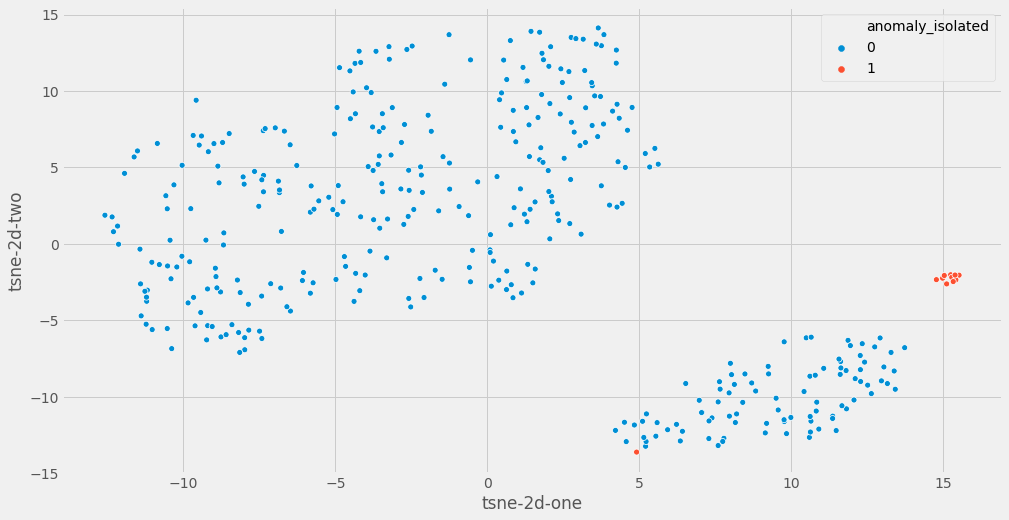

In [266]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
#     palette=sns.color_palette("hls", 10),
    data=final_data,
    legend="full",
    alpha=1
)

In [267]:
final_data.loc[final_data['anomaly_isolated']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
62,10.1.1.249,4301,116.5,2.236268,9.459535,101.0,0,15.251910,-2.014084,11.541074,1,1,1,1
118,10.1.1.386,4300,118.5,2.127273,9.453361,104.0,0,15.528737,-2.041709,11.779482,1,1,1,1
164,10.1.1.486,4317,117.0,2.315668,9.417285,108.0,0,14.781444,-2.334249,11.659370,1,1,1,1
177,10.1.1.63,4339,112.0,2.148766,9.368142,101.0,0,15.287605,-2.182364,11.319226,1,1,1,1
188,10.1.1.86,4293,113.0,2.203731,9.456897,110.0,0,15.423254,-2.342858,11.090154,1,1,1,1
255,10.1.2.249,4353,112.0,2.250934,9.332721,102.0,0,14.986474,-2.238024,11.318310,1,1,1,1
311,10.1.2.386,4326,108.0,2.250188,9.392370,110.0,0,15.119220,-2.613225,10.791042,1,1,1,1
357,10.1.2.486,4251,114.0,2.056075,9.571059,99.0,0,15.041411,-2.061416,11.438757,1,1,1,1
361,10.1.2.497,2973,83.5,2.440972,13.869785,165.0,2,4.914829,-13.606808,5.452700,0,1,1,0
370,10.1.2.63,4372,121.0,2.184268,9.268588,118.0,0,15.395945,-2.032638,12.054720,1,1,1,1


# One Class SVM

In [268]:
model =  OneClassSVM(nu=outlier_fraction, random_state=RANDOM_STATE, degree=2, kernel='rbf')

In [269]:
data_new_clean = data_new.loc[data_new.total_count <=data_new.total_count.quantile(1-outlier_fraction)]

In [270]:
model.fit(data_new_clean)

/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/sklearn/svm/classes.py:1175: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
/Users/sanganichaitanya/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=2, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.028, random_state=123,
      shrinking=True, tol=0.001, verbose=False)

In [271]:
final_data['anomaly_svm'] = pd.Series(model.predict(data_new))

In [272]:
final_data['anomaly_svm'] = final_data['anomaly_svm'].map( {1: 0, -1: 1} )

In [273]:
final_data['anomaly_svm'].value_counts()

0    365
1     21
Name: anomaly_svm, dtype: int64

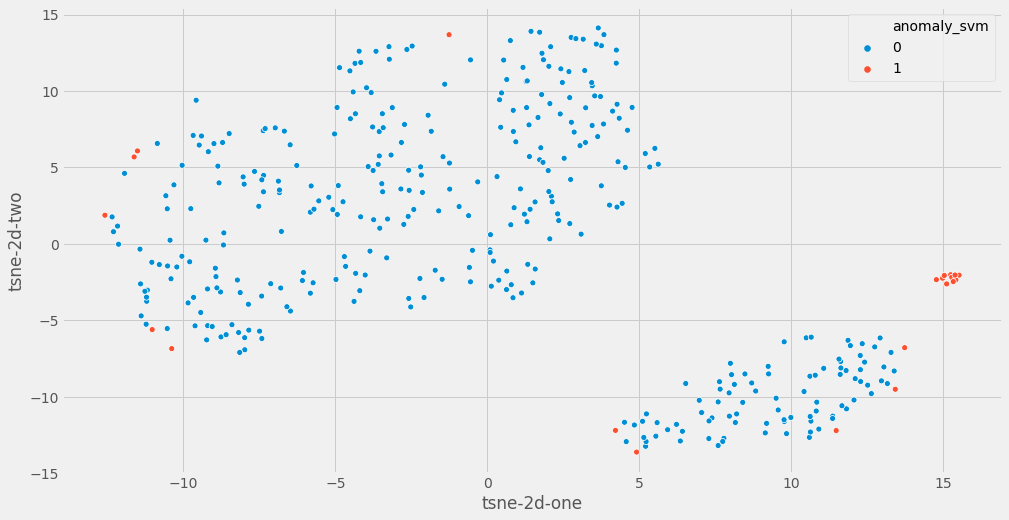

In [274]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_svm",
#     palette=sns.color_palette("hls", 10),
    data=final_data,
    legend="full",
    alpha=1
)

In [275]:
final_data.loc[final_data['anomaly_svm']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
14,10.1.1.138,1383,39.5,2.546154,30.306078,297.0,3,-11.028182,-5.598881,5.249748,0,0,1,0
42,10.1.1.199,1365,40.5,2.123570,30.801320,455.0,5,-11.512229,6.081614,6.164888,1,0,1,0
62,10.1.1.249,4301,116.5,2.236268,9.459535,101.0,0,15.251910,-2.014084,11.541074,1,1,1,1
70,10.1.1.264,1445,42.5,2.621554,29.042936,241.0,3,-10.385866,-6.843124,5.357686,0,0,1,0
118,10.1.1.386,4300,118.5,2.127273,9.453361,104.0,0,15.528737,-2.041709,11.779482,1,1,1,1
134,10.1.1.424,2990,80.0,2.225458,13.777852,117.0,2,11.483550,-12.199755,5.263552,0,0,1,0
164,10.1.1.486,4317,117.0,2.315668,9.417285,108.0,0,14.781444,-2.334249,11.659370,1,1,1,1
171,10.1.1.500,2946,80.0,2.147436,13.989134,120.0,2,13.428407,-9.499339,5.189349,0,0,1,0
177,10.1.1.63,4339,112.0,2.148766,9.368142,101.0,0,15.287605,-2.182364,11.319226,1,1,1,1
188,10.1.1.86,4293,113.0,2.203731,9.456897,110.0,0,15.423254,-2.342858,11.090154,1,1,1,1


# Performance of Algo

Since it is unsupervised we need to manually label the data and see the performance of the individual algos

- Criteria for manual labels is strictly based on counts as we want the algos to be robust on count anomalies

In [276]:
total_counts_condition = (final_data['total_count'] >= final_data['total_count'].quantile(0.98)) 
daily_counts_condition =  (final_data['daily_counts'] >= final_data['daily_counts'].quantile(0.98))

In [277]:
final_data['anomaly_manual'] = (total_counts_condition | daily_counts_condition).astype(np.int)

In [278]:
final_data.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
0,10.1.1.1,1446,40.0,2.070064,28.999308,362.0,5,-4.352579,11.806170,4.570390,0,0,0,0
1,10.1.1.100,2860,78.0,2.177778,14.427072,185.0,2,9.245516,-8.002912,4.393522,0,0,0,0
2,10.1.1.101,1465,40.0,2.191721,28.520492,211.0,1,4.270270,2.411105,3.658624,0,0,0,0
3,10.1.1.106,1408,35.5,2.229358,29.771144,319.0,5,-7.361582,4.483963,4.265576,0,0,0,0
4,10.1.1.109,1459,42.5,2.206593,28.711934,278.0,1,-2.134053,3.368442,3.626661,0,0,0,0


In [279]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [280]:
def get_sensitivity_specificity(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sensitivity = cf[0,0]/(cf[:,0].sum())
    specificity = cf[1,1]/(cf[:,1].sum())
    return sensitivity, specificity

In [281]:
f1_iso = f1_score(final_data['anomaly_manual'],final_data['anomaly_isolated'])
acc_iso = accuracy_score(final_data['anomaly_manual'],final_data['anomaly_isolated'])
roc_iso = roc_auc_score(final_data['anomaly_manual'],final_data['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(final_data['anomaly_manual'],final_data['anomaly_isolated'])
met_iso = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
          }

In [282]:
f1_kmeans = f1_score(final_data['anomaly_manual'],final_data['anomaly_kmeans'])
acc_kmeans = accuracy_score(final_data['anomaly_manual'],final_data['anomaly_kmeans'])
roc_kmeans = roc_auc_score(final_data['anomaly_manual'],final_data['anomaly_kmeans'])
sen_kmeans, spec_kmeans = get_sensitivity_specificity(final_data['anomaly_manual'],final_data['anomaly_kmeans'])
met_kmeans = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans,
           'specificity': spec_kmeans
          }

In [283]:
f1_svm = f1_score(final_data['anomaly_manual'],final_data['anomaly_svm'])
acc_svm = accuracy_score(final_data['anomaly_manual'],final_data['anomaly_svm'])
roc_svm = roc_auc_score(final_data['anomaly_manual'],final_data['anomaly_svm'])
sen_svm, spec_svm = get_sensitivity_specificity(final_data['anomaly_manual'],final_data['anomaly_svm'])
met_svm = {
           'f1_score': f1_svm,
           'accuracy': acc_svm,
           'roc_score': roc_svm,
           'sensitivity': sen_svm,
           'specificity': spec_svm
          }

In [284]:
metrics = {'isolated_forest': met_iso,
           'kmeans': met_kmeans,
           'svm': met_svm
          }

In [285]:
metrics_df = pd.DataFrame.from_dict(metrics)

In [286]:
metrics_df

,isolated_forest,kmeans,svm
accuracy,0.997409,0.994819,0.971503
f1_score,0.952381,0.909091,0.645161
roc_score,0.998670,0.997340,0.985372
sensitivity,1.000000,1.000000,1.000000
specificity,0.909091,0.833333,0.476190
